# Indicators of heavy traffic on I-94

This project will go into the various factors that might indicate a higher liklihood of traffic on the I-94's westbound traffic. For instance, it might be caused by the time of day, the day of the week, or various weather conditions; or possibly some combination. I hope to find this information using pandas exploratory vizualization with grid charts, bar plots, and other kinds of plots. The dataset can he found [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

In [1]:
import pandas as pd
Metro_Interstate_Traffic_Volume = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

print(Metro_Interstate_Traffic_Volume.head())
print('\n')
print(Metro_Interstate_Traffic_Volume.tail())
Metro_Interstate_Traffic_Volume.info()

import matplotlib.pyplot as plt
%matplotlib inline

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  


      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0 

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

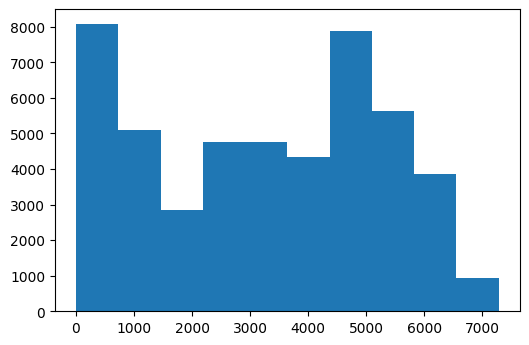

In [2]:
traffic = Metro_Interstate_Traffic_Volume
plt.hist(traffic['traffic_volume'])

traffic['traffic_volume'].describe()

The plot seems to have a somewhat uniform distribution, although really there is no clear distribution. It is interesting that there is a significant amount of time where there are less than 1000 cars on the interstate, and where there is 5000-6000 cars of the interstate. So perhaps half of the time the interstate is either very busy with traffic, or there are very few cars. The first case could be a result of it being very late at night (11PM -3AM) and the second case could be a result of it being rush hour (4PM - 6PM). To see if there is any real difference between day and nighttime I will seperate the dataset into two parts: day being 7AM-7PM, and night being 7PM-7AM.

In [3]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [4]:
day = traffic[(traffic['date_time'].dt.hour <= 19) & (traffic['date_time'].dt.hour > 7)]

In [5]:
day

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132
48198,None,284.20,0.25,0.0,75,Rain,light rain,2018-09-30 18:00:00,3947


In [6]:
night = traffic[(traffic['date_time'].dt.hour > 19) | (traffic['date_time'].dt.hour <= 7)]
night

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
11,None,289.38,0.0,0.0,1,Clear,sky is clear,2012-10-02 20:00:00,2784
12,None,288.61,0.0,0.0,1,Clear,sky is clear,2012-10-02 21:00:00,2361
13,None,287.16,0.0,0.0,1,Clear,sky is clear,2012-10-02 22:00:00,1529
14,None,285.45,0.0,0.0,1,Clear,sky is clear,2012-10-02 23:00:00,963
15,None,284.63,0.0,0.0,1,Clear,sky is clear,2012-10-03 00:00:00,506
...,...,...,...,...,...,...,...,...,...
48185,None,280.16,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 07:00:00,1175
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


Both sets have roughly half of 48000 columns, so it;s looking good.

(0.0, 8000.0)

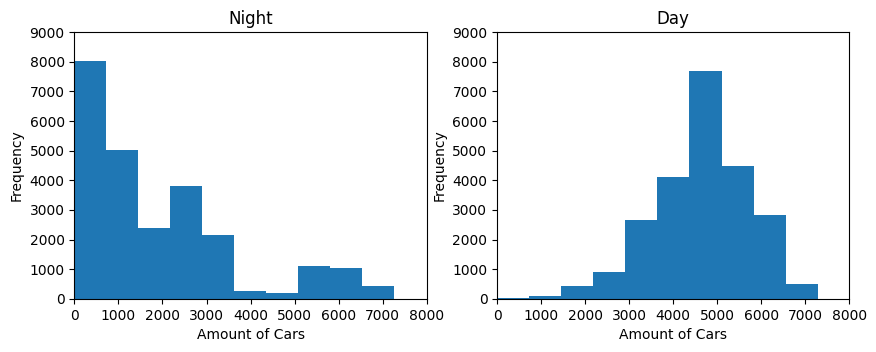

In [7]:
plt.figure(figsize=(10, 12))

# The first subplot
plt.subplot(3, 2, 1)
plt.hist(night['traffic_volume'])
plt.title('Night')
plt.xlabel('Amount of Cars')
plt.ylabel('Frequency')
plt.ylim([0,9000])
plt.xlim([0,8000])

# The second subplot
plt.subplot(3, 2, 2)
plt.hist(day['traffic_volume'])
plt.title('Day')
plt.xlabel('Amount of Cars')
plt.ylabel('Frequency')
plt.ylim([0,9000])
plt.xlim([0,8000])

In [8]:
day['traffic_volume'].describe()

count    23759.00000
mean      4641.33924
std       1068.65102
min          0.00000
25%       4049.00000
50%       4708.00000
75%       5337.00000
max       7280.00000
Name: traffic_volume, dtype: float64

In [9]:
night['traffic_volume'].describe()

count    24445.000000
mean      1917.067089
std       1736.799020
min          0.000000
25%        532.000000
50%       1242.000000
75%       2772.000000
max       7260.000000
Name: traffic_volume, dtype: float64

The night time histogram skews to the right, meaning most of the time there are very few cars on the road. We probably won't be using this data to find indicators of heavy traffic, so for now we will be using the daytime dataframe solely.

The day time histogram has a normal distribution that skews slightly to the left. The mean amount of cars on the road is much higher during the day, as it is more than twice as high.

In [10]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

<ipython-input-10-b104fbd4ed31>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4379.382785
2     4577.445087
3     4755.891671
4     4742.272508
5     4769.600454
6     4787.214477
7     4494.121650
8     4799.611891
9     4745.968382
10    4812.563146
11    4574.138274
12    4313.228426
Name: traffic_volume, dtype: float64

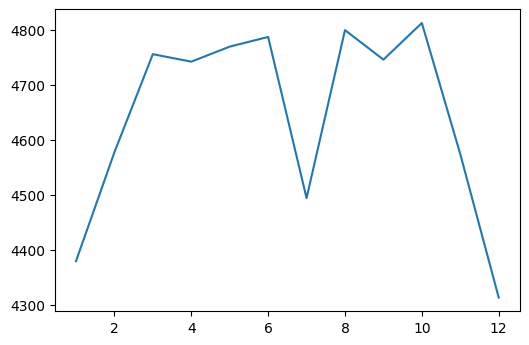

In [11]:
plt.plot(by_month['traffic_volume'])

Here we see that the traffic is moslty consistent except during the months of November to January, and July; where there are noticable dips in traffic.

In [12]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

<ipython-input-12-e4e897828b56>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4654.143222
1    4949.945727
2    5058.010219
3    5075.290639
4    5085.229148
5    4056.587118
6    3606.582789
Name: traffic_volume, dtype: float64

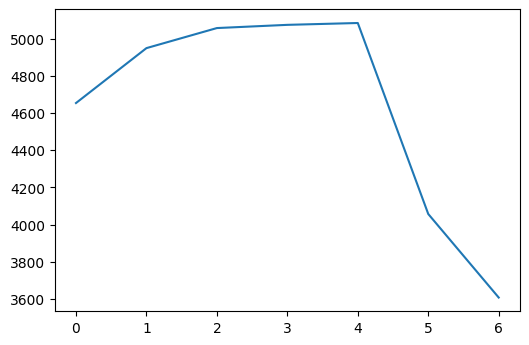

In [13]:
plt.plot(by_dayofweek['traffic_volume'])

Here the biggest difference is between weekdays and weekends, where weekends are less busy than weekdays. Also, there is a slight upwards trend throughout the weekdays from Monday to Friday.

In [14]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
Name: traffic_volume, dtype: float64
hour
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
Name: traffic_volume, dtype: float64


<ipython-input-14-4244afafd4b2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



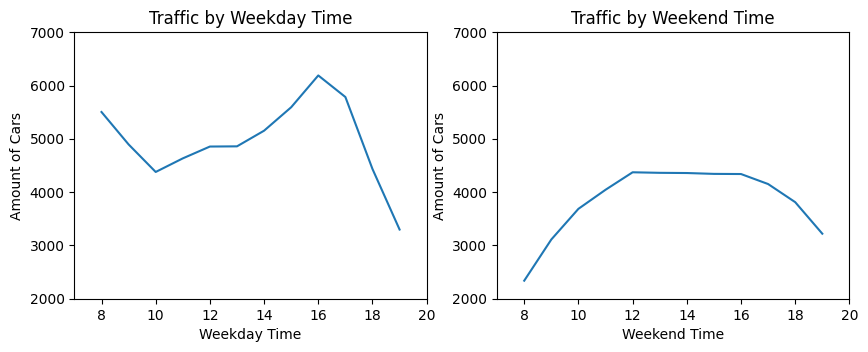

In [15]:
plt.figure(figsize=(10, 12))

# The first subplot
plt.subplot(3, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Traffic by Weekday Time')
plt.ylabel('Amount of Cars')
plt.xlabel('Weekday Time')
plt.ylim([2000,7000])
plt.xlim([7,20])

plt.subplot(3, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Traffic by Weekend Time')
plt.ylabel('Amount of Cars')
plt.xlabel('Weekend Time')
plt.ylim([2000,7000])
plt.xlim([7,20])

plt.show()

As you can see, the busiest time of day during the weekend is around 8 in the morning,and from 2-5PM in the afternoon. This is becuase those are the times people commute to work. The weekend has much less traffic, with no spikes during rush hour (which makes sense).

In [16]:
day.corr()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
temp,1.000000,0.010519,-0.019889,-0.156597,0.133283,0.216917,0.002207,0.129902
rain_1h,0.010519,1.000000,-0.000086,0.004875,0.005001,0.001162,-0.009854,0.006581
snow_1h,-0.019889,-0.000086,1.000000,0.027333,0.005186,0.026034,-0.008344,-0.003596
clouds_all,-0.156597,0.004875,0.027333,1.000000,-0.037828,0.000447,-0.044472,0.008198
traffic_volume,0.133283,0.005001,0.005186,-0.037828,1.000000,-0.012350,-0.324395,0.004045
month,0.216917,0.001162,0.026034,0.000447,-0.012350,1.000000,0.013141,0.001215
dayofweek,0.002207,-0.009854,-0.008344,-0.044472,-0.324395,0.013141,1.000000,-0.001457
hour,0.129902,0.006581,-0.003596,0.008198,0.004045,0.001215,-0.001457,1.000000


Text(0.5, 0, 'Traffic')

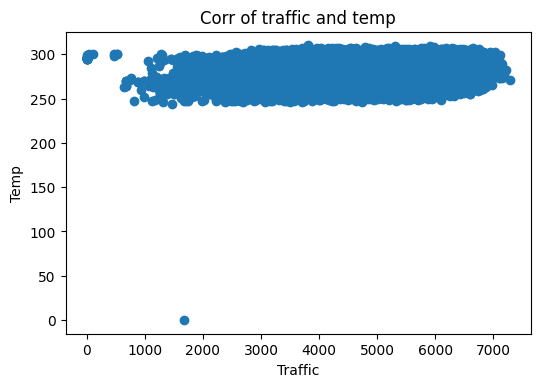

In [17]:
plt.scatter(day['traffic_volume'],day['temp'])
plt.title('Corr of traffic and temp')
plt.ylabel('Temp')
plt.xlabel('Traffic')

Temperature seems the strongest correlated weather indicator for the traffic volume, but even it has a very low R value. So really none of these are reliable indicators for heavy traffic, including temp. However, these are only the numerical columns, so I will look at the other two weather columns to see if they have higher correlation.

In [18]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()
by_weather_main

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
weather_main,,,,,,,,
Clear,284.515297,0.000000,0.000000,1.672533,4662.582471,6.501553,3.144928,13.446860
Clouds,283.372306,0.000000,0.000000,62.623099,4744.546704,6.402254,2.998986,13.791887
Drizzle,284.413643,0.165659,0.000000,84.980527,4694.158076,7.105384,2.912944,13.386025
Fog,276.043684,0.198140,0.001789,74.347368,4136.673684,6.575439,2.778947,11.814035
Haze,275.958971,0.062703,0.000000,64.326555,4549.198565,5.912679,2.736842,13.057416
Mist,279.201715,0.247929,0.000896,78.814751,4484.141081,6.748285,2.894940,12.337479
Rain,287.253640,3.931264,0.000290,75.973464,4670.116271,6.748603,2.899092,13.669693
Smoke,293.255000,0.878333,0.000000,50.083333,4636.083333,7.000000,2.000000,14.166667
Snow,268.122477,0.014396,0.001759,80.894627,4283.592463,6.445918,2.759246,13.108165


Text(0, 0.5, 'Traffic')

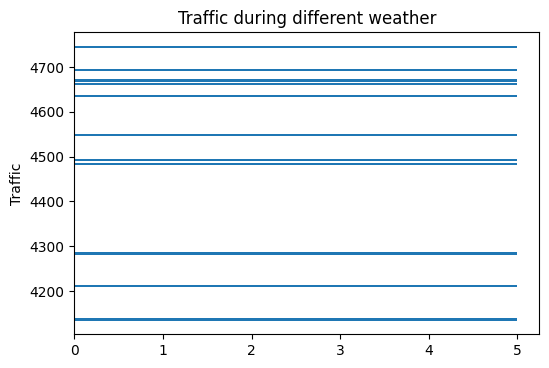

In [24]:
plt.barh(by_weather_main['traffic_volume'], width = 5, height = 5)
plt.title('Traffic during different weather')
plt.ylabel('Traffic')


In [20]:
by_weather_description

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,month,dayofweek,hour
weather_description,,,,,,,,
SQUALLS,296.730000,1.020000,0.000000,75.000000,4211.000000,7.000000,2.000000,14.000000
Sky is Clear,294.056878,0.000000,0.000000,0.000000,4790.586166,7.562720,2.886284,13.487691
broken clouds,282.754388,0.000000,0.000000,72.649104,4716.012645,6.660695,2.980681,13.619951
drizzle,283.669784,0.128058,0.000000,89.107914,4525.467626,7.269784,2.992806,13.122302
few clouds,285.103034,0.000000,0.000000,19.362931,4732.974138,6.181034,2.963793,13.606034
fog,276.043684,0.198140,0.001789,74.347368,4136.673684,6.575439,2.778947,11.814035
freezing rain,272.860000,0.000000,0.000000,90.000000,4314.000000,6.500000,0.500000,13.500000
haze,275.958971,0.062703,0.000000,64.326555,4549.198565,5.912679,2.736842,13.057416
heavy intensity drizzle,285.860400,0.320400,0.000000,87.040000,4526.240000,8.000000,3.080000,13.600000


<Figure size 50x100 with 0 Axes>

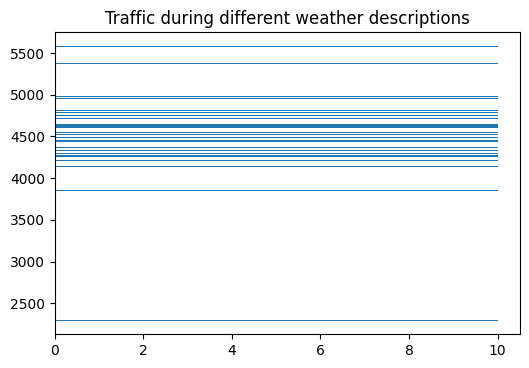

<Figure size 50x100 with 0 Axes>

In [27]:
plt.barh(by_weather_description['traffic_volume'], width = 10, height = 10)
plt.title('Traffic during different weather descriptions')
plt.figure(figsize=(.5,1))



Here the heavy traffic (>5000) is caused by light snow or rain, and shower drizzle. The clearest correlations occured based on the time and day of weeked, with the most traffic occuring during weekdays, the daytime, and at rushhour (8AM, 3-5PM). There is also some indication that the traffic gets the worst with light rain/snow, which thinking back to drivers-ed was one of the most dangerous times to drive (even more prone to accidents than heavy rain as the road is slickest when it is just slightly wet). A